# **Análisis de sentimiento en Twitter**

## **Marcos Damian Pool Canul**

### Importando librerias

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud

### Explorando los datos

In [2]:
data=pd.read_csv('./files/twitter_training.csv', sep=',', names=['Tweet_ID','Entity','Sentiment','Tweet_content'])

In [4]:
data.head(20)

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [5]:
data.shape

(74682, 4)

In [15]:
data.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

([<matplotlib.patches.Wedge at 0x22e63538f90>,
 [Text(-0.8936408809046303, 0.6414093669225578, 'Negative'),
  Text(-0.39649770564254117, -1.0260553442286633, 'Positive'),
  Text(1.0532293937999033, -0.3173449921392938, 'Neutral'),
  Text(0.5716146417662045, 0.9398173765782871, 'Irrelevant')],
 [Text(-0.4874404804934347, 0.3498596546850315, '30.2%'),
  Text(-0.21627147580502246, -0.5596665513974527, '27.9%'),
  Text(0.5744887602544927, -0.17309726843961476, '24.5%'),
  Text(0.31178980459974787, 0.5126276599517929, '17.4%')])

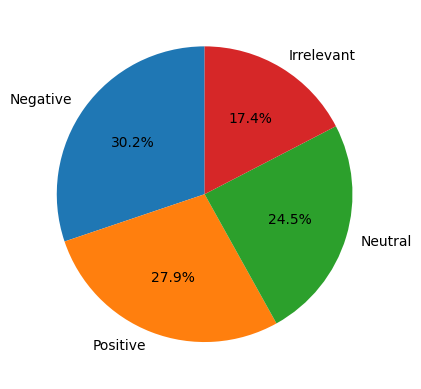

In [16]:
plt.pie(data.Sentiment.value_counts(), labels=['Negative','Positive','Neutral','Irrelevant'],autopct='%1.1f%%',startangle=90)

In [17]:
data.Sentiment.value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

In [20]:
def sentiment_analysis_from_dataframe(df, text_column):
    all_text = ' '.join(df[text_column].astype(str).tolist())
    blob = TextBlob(all_text)
    sentiment_score = blob.sentiment.polarity
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white').generate(all_text)
    df['Score_NLTK'] = sentiment_score
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return sentiment_score

#### Mapa de palabras

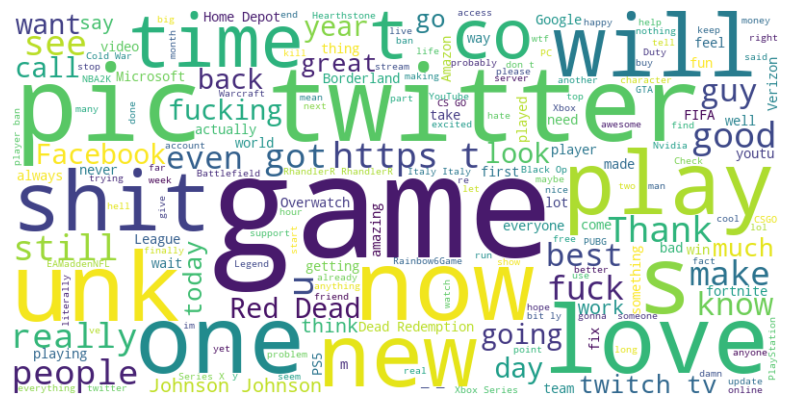

Puntuación de sentimiento: 0.09394790379620398


In [23]:
score = sentiment_analysis_from_dataframe(data, 'Tweet_content')
print("Puntuación de sentimiento:", score)

### Limpieza de datos

Eliminar datos duplicados

In [24]:
data.duplicated().sum()

2700

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data.duplicated().sum()

0

Eliminar nulos

In [27]:
data.isnull().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    326
Score_NLTK         0
dtype: int64

In [28]:
data.dropna(axis=0, inplace=True)

In [29]:
data.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
Score_NLTK       0
dtype: int64

In [30]:
data.reset_index(inplace=True)

In [31]:
data.shape

(71656, 6)

### Preprocesamiento de texto

In [46]:
df1 = pd.read_csv('./files/twitter_training.csv', header=None)
df1.columns = ['id', 'information', 'label', 'tweet']
df1.head()

,id,information,label,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
